# Magic the Gathering Data Analysis
## Nicholas Saveas

The source data can be found here: https://mtgjson.com/

In [35]:
import json
from pprint import pprint

data = json.load(open('../AllSets.json'), encoding = "utf8")

## Analyzing set names
I understand that this serves no real purpose and tells me nothing about the game. It just seems like to fun to visualize and play around with this sort of data.

As you can see there are a lot of sets - 220 to be exact.

In [36]:
# Initialize an emtpy list then populate it with the set names
# The top level of the data set from the json file is organized by set names
allSets = []
for i in data:
    allSets.append(i)

print(allSets)

print(len(allSets))

['UST', 'UNH', 'UGL', 'pWOS', 'pWOR', 'pWCQ', 'pSUS', 'pSUM', 'pREL', 'pPRO', 'pPRE', 'pPOD', 'pMPR', 'pMGD', 'pMEI', 'pLPA', 'pLGM', 'pJGP', 'pHHO', 'pWPN', 'pGTW', 'pGRU', 'pGPX', 'pFNM', 'pELP', 'pDRC', 'pCMP', 'pCEL', 'pARL', 'pALP', 'p2HG', 'p15A', 'PD3', 'PD2', 'H09', 'PTK', 'POR', 'PO2', 'PCA', 'PC2', 'HOP', 'VMA', 'MMA', 'MM3', 'MM2', 'MED', 'ME4', 'ME3', 'ME2', 'IMA', 'EMA', 'MPS_AKH', 'MPS', 'EXP', 'E02', 'V17', 'V16', 'V15', 'V14', 'V13', 'V12', 'V11', 'V10', 'V09', 'DRB', 'EVG', 'DDT', 'DDS', 'DDR', 'DDQ', 'DDP', 'DDO', 'DDN', 'DDM', 'DDL', 'DDK', 'DDJ', 'DDI', 'DDH', 'DDG', 'DDF', 'DDE', 'DDD', 'DDC', 'DD3_JVC', 'DD3_GVL', 'DD3_EVG', 'DD3_DVD', 'DD2', 'CNS', 'CN2', 'CMD', 'CMA', 'CM1', 'C17', 'C16', 'C15', 'C14', 'C13', 'CEI', 'CED', 'E01', 'ARC', 'ZEN', 'XLN', 'WWK', 'WTH', 'W17', 'W16', 'VIS', 'VAN', 'USG', 'ULG', 'UDS', 'TSP', 'TSB', 'TPR', 'TOR', 'TMP', 'THS', 'STH', 'SOM', 'SOK', 'SOI', 'SHM', 'SCG', 'S99', 'S00', 'RTR', 'RQS', 'ROE', 'RIX', 'RAV', 'PLS', 'PLC', 'PCY'

## Cleaning the data
The set codes contain a lot of not legal in tournament play.

I want the data to focus on only the legal expansion/core sets and not the introduction, compilation, or core sets. 

Surprisingly, the legal sets make up less than half of the total number of magic sets with set codes.

In [37]:
# Print the set names but clean the data a bit
expansionSets = [x for x in allSets if len(x) == 3]                                # set names longer than 3 characters are special/promo sets
expansionSets = [x for x in expansionSets if not((x[0] == 'D') and (x[1] == 'D'))] # remove the duel deck sets as they are skewing the data
expansionSets = [x for x in expansionSets if not((x[0] == 'C') and (x[1] == '1'))] # remove the commander sets as well
expansionSets = [x for x in expansionSets if not((x[0] == 'V') and (x[1] == '1'))] # remove the vault sets
expansionSets = [x for x in expansionSets if not((x[0] == 'W') and (x[1] == '1'))] # remove the deck builders toolkits

notLegal = ['POR', 'PO2', 'PTK', 'S99', 'S00', 'CHR', 'ATH', 'BRB' ,'BTD', 'DKM', 'DPA', 'MD1', 'EVG', 'DRB', 'V09'
           ,'H09', 'PD2', 'PD3', 'MMA', 'MM2', 'EMA', 'MM3', 'IMA' ,'ARC', 'E01', 'HOP', 'PC2', 'PCA', 'CMD', 'CM1'
           ,'CMA', 'CNS', 'CN2', 'E02', 'CED', 'UGL', 'UNH', 'UST' ,'MED', 'ME2', 'ME3', 'ME4', 'VMA', 'TPR']

for i in notLegal:
    expansionSets.remove(i)
    
print(expansionSets)
print(len(expansionSets))

['MPS', 'EXP', 'CEI', 'ZEN', 'XLN', 'WWK', 'WTH', 'VIS', 'VAN', 'USG', 'ULG', 'UDS', 'TSP', 'TSB', 'TOR', 'TMP', 'THS', 'STH', 'SOM', 'SOK', 'SOI', 'SHM', 'SCG', 'RTR', 'RQS', 'ROE', 'RIX', 'RAV', 'PLS', 'PLC', 'PCY', 'ORI', 'ONS', 'OGW', 'ODY', 'NPH', 'NMS', 'MRD', 'MOR', 'MMQ', 'MIR', 'MGB', 'MBS', 'M15', 'M14', 'M13', 'M12', 'M11', 'M10', 'LRW', 'LGN', 'LEG', 'LEB', 'LEA', 'KTK', 'KLD', 'JUD', 'JOU', 'ITP', 'ISD', 'INV', 'ICE', 'HOU', 'HML', 'GTC', 'GPT', 'FUT', 'FRF', 'FEM', 'EXO', 'EVE', 'EMN', 'DTK', 'DST', 'DRK', 'DKA', 'DIS', 'DGM', 'CST', 'CSP', 'CP3', 'CP2', 'CP1', 'CON', 'CHK', 'BOK', 'BNG', 'BFZ', 'AVR', 'ATQ', 'ARN', 'ARB', 'APC', 'ALL', 'ALA', 'AKH', 'AER', '9ED', '8ED', '7ED', '6ED', '5ED', '5DN', '4ED', '3ED', '2ED', '10E']
107


In [3]:
# Initialize an empty dictionary
setLetters = dict()

setLetters = {'0': 0,'1': 0,'2': 0,'3': 0,'4': 0,'5': 0,'6': 0,'7': 0,'8': 0,'9': 0,'A': 0,'B': 0,'C': 0,'D': 0,'E': 0,'F': 0,'G': 0,
'H': 0,'I': 0,'J': 0,'K': 0,'L': 0,'M': 0,'N': 0,'O': 0,'P': 0,'Q': 0,'R': 0,'S': 0,'T': 0,'U': 0,'V': 0,'W': 0,
'X': 0,'Y': 0,'Z': 0}


# Iterate through every set name and then every letter in that set name
for i in range(0, len(sets)):
    for l in sets[i]:
        if l not in setLetters.keys():     # if the letter is not a key
            setLetters[l] = 1              # add it to the dictionary with value 1
        else:                              # otherwise - it is in the dictionary
            setLetters[l] += 1             # increment the value stored at the key
            
setLetters                                 # I don't print() it because it's more readable this way

{'0': 9,
 '1': 28,
 '2': 12,
 '3': 8,
 '4': 5,
 '5': 5,
 '6': 4,
 '7': 4,
 '8': 1,
 '9': 5,
 'A': 23,
 'B': 12,
 'C': 30,
 'D': 70,
 'E': 33,
 'F': 6,
 'G': 14,
 'H': 15,
 'I': 13,
 'J': 3,
 'K': 14,
 'L': 16,
 'M': 41,
 'N': 17,
 'O': 19,
 'P': 26,
 'Q': 4,
 'R': 25,
 'S': 28,
 'T': 23,
 'U': 10,
 'V': 17,
 'W': 7,
 'X': 4,
 'Y': 2,
 'Z': 2}

It is a little silly to manually add all the keys, but it makes sense to have the keys inserted first just in case there is a letter that has 0 occurences.<br>
The previous method I chose only accounted for existing letters and not those that didnt appear.<br>
In the end it didn't really matter because every key had at least one entry.

In [4]:
# set up, see here: https://pythonspot.com/matplotlib-bar-chart/
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = setLetters.keys()         # the keys in the dictionary become the x axis - in lexicographic order
y_pos = np.arange(len(objects))
frequency = setLetters.values()     # the values in the dictionary become the y axis

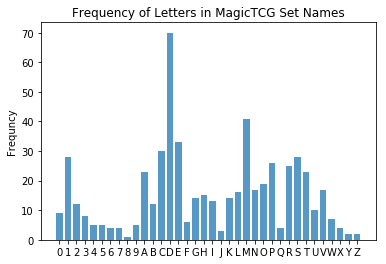

In [5]:
plt.bar(y_pos, frequency, align = 'center', alpha = 0.75)    # alpha determines how opaque the bars are in color
plt.xticks(y_pos, objects)
plt.ylabel('Frequncy')
plt.title('Frequency of Letters in MagicTCG Set Names')
 
plt.show()

### Conclusion on Set Names

Technically I did not clean my data well enough because some of the sets are "Masters" and "Commander" sets which are not true expansion sets - they do not add new playable cards. These are only additional sets that provide either reprints (or remasters) of existing cards or new cards made only for a specific game mode called Commander.

Before I added all the keys in order I was adding them as they appeared, which lead to a an cleaner way to show poorly visualized data. Funnily enough, even after sorting the keys I thought there was still an error because "D" was the most common letter and I just didn't think that was a possibility.

Although this tells me exactly nothing about the game it certainly is interesting to see that "D" is such a popular set letter name throughout all of magic's history. I would have thought "M" would be the most popular considering the set names like "M11", "M12", "M13", etc. 